In [86]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
import tensorflow as tf
import cv2
import numpy as np
pre_trained_model = tf.keras.models.load_model('saved_model/my_model')

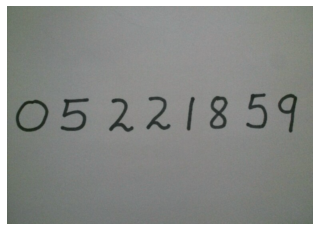

In [87]:
image = cv2.imread('image.jpg')
plt.axis('off')
plt.imshow(image);

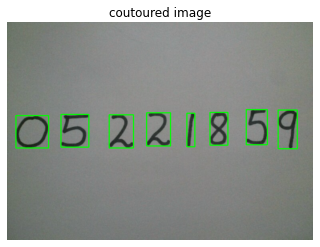

In [88]:
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(grey.copy(), (5,5), 0)
_, thresh = cv2.threshold(blur.copy(),0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_rect = [cv2.boundingRect(c) for c in contours]
contours_rect = sorted(contours_rect)

tmp = image.copy()
preprocessed_digits = []
small_param = 0.001

for x,y,w,h in contours_rect:
    # filter out small rect
    if w*h < small_param * tmp.shape[0] * tmp.shape[1]:
        continue
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    green_RGB = 0,255,0
    cv2.rectangle(tmp, (x,y), (x+w, y+h), color=green_RGB, thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, 5, "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    
plt.title('coutoured image')
plt.axis('off')
plt.imshow(tmp, cmap="gray")
plt.show()
preprocessed_digits = np.array(preprocessed_digits)

In [89]:
digits = tf.constant(preprocessed_digits)
digits = digits[..., tf.newaxis]
digits = tf.image.resize(digits, (28,28))
digits = digits.numpy()
digits = digits.reshape(-1,28*28)
digits.shape

(8, 784)

In [90]:
pred = pre_trained_model.predict(digits)

1/1 [==============================] - 0s 161ms/step


In [91]:
pred = [np.argmax(p) for p in pred]
pred

[0, 5, 2, 2, 1, 3, 5, 9]

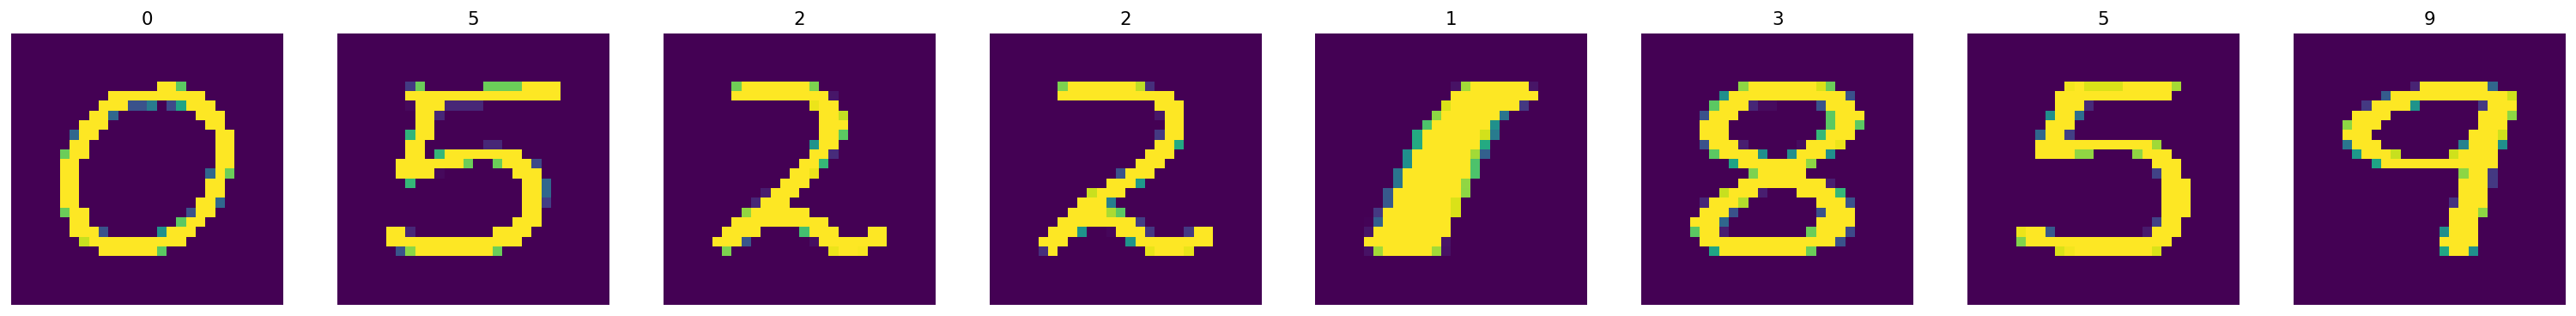

In [92]:
fig, axes = plt.subplots(1, len(preprocessed_digits), figsize = (30,30), dpi = 128)
for p, pic,ax in zip(pred, preprocessed_digits, axes):
    ax.axis('off')
    ax.imshow(pic)
    ax.set_title(p)